# Lista de Exercícios - Preparação de Dados

## Disciplina: Inteligência Artificial 
## FATEC Ferraz de Vasconcelos
### Professora: Ana Rosa C. Tonão
#### Data de Entrega: 12/05/2025

---------

### **Instruções importantes:**

(1) Este exercício deve ser realizado em **grupos de 3 integrantes (máximo)**.

(2) **Informe seu(s) nome(s) completo(s) na tabela abaixo:**




| Alunos(as) | 
| ----------- | 
| Nome: ______________________________________________________________| 
| Nome: ______________________________________________________________| 
| Nome: ______________________________________________________________| 


(3) Utilize os arquivos de dados **"dataset - churn_hw2_train.xlsx"** e **"dataset - churn_hw2_test.xlsx"** anexos na tarefa.

(4) **Execute o roteiro informado abaixo:**

----

**ROTEIRO**

* Leia a descrição da tarefa fornecida abaixo antes de iniciar a programação.
* Carregue os arquivos em DataFrames separados.
* Prepare os dados realizando uma inspeção de valores faltantes (missing values), justificando cada escolha de tratamento implementada.
* Trate observações duplicadas (se encontradas).
* Grave os DataFrames tratados em novos arquivos com extensão .csv.

*IMPORTANTE:* **Antes de entregar este notebook e os arquivos deduplicados no Teams, altere os nomes de todos os arquivos, incluindo seu primeiro nome (nome do aluno) no início de cada arquivo.** 

**Exemplos:**

Ana_ILP018 1SEM2023 Lista de Exercícios (churn).ipynb

Ana_dataset - churn_hw2_train.csv

Ana_dataset - churn_hw2_test.csv

------

## Descrição da Tarefa

**Segmentação de prováveis churners**

Parabéns! Você foi contratado pela AABC&D, uma prestigiada empresa de consultoria em análise. 

Seu primeiro projeto será desenvolver e avaliar um modelo de previsão para a MegaTelco, uma empresa de telecomunicações. 

Eles estão tendo um grande problema com a retenção de clientes no negócio de produtos e serviços sem fio, sendo que 20% dos clientes de telefonia celular abandonam o serviço quando seus contratos vencem. 

Está ficando cada vez mais difícil adquirir novos clientes, pois o mercado de telefones celulares está saturado.

Churn (rotatividade) é a transferência de clientes de uma empresa para outra e é algo dispendioso em todos os sentidos: uma empresa precisa gastar em incentivos para atrair um cliente, enquanto outra empresa perde rendimento quando o cliente vai embora.

Você foi chamado para ajudar a entender o problema e encontrar uma solução.

Atrair novos clientes é muito mais caro do que manter os que já existem, por isso, uma boa verba de marketing foi alocada para evitar a rotatividade.

O objetivo da MegaTelco é identificar os prováveis *churners* para que possam direcioná-los com uma oferta muito atraente:

**Um período de carência de um ano com todas as comunicações pela metade do preço, sem compromisso.**

**Descrição dos dados**

Para este projeto, a MegaTelCo forneceu um conjunto de dados históricos de 14.088 clientes, a partir dos quais já criou dois conjuntos de dados: um conjunto de treino (dataset - churn_hw2_train.xlsx) com 9.856 clientes e um conjunto de teste (dataset - churn_hw2_test.xlsx) com 4.232 clientes. 

No momento da coleta dos dados, cada cliente tinha permanecido na empresa ou tinha saído (churned). 

Cada cliente é descrito pelas variáveis listadas abaixo:


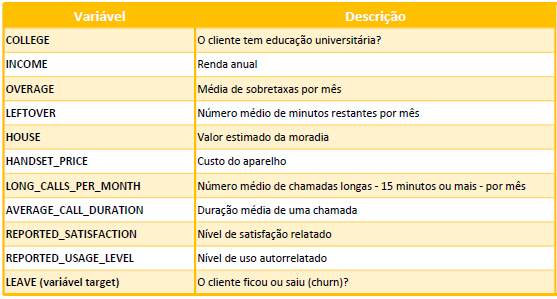

**Fonte**:

FAWCETT,T.;PROVOST,F. **Data Science para Negócios**.Rio de Janeiro, RJ:Alta Books, 2016.

----

## Importando as bibliotecas necessárias

In [1]:
# importando o pandas 
import pandas as pd

## (1) Carregando dados

### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*


In [2]:
# Carregando os arquivos de dados (dataset de TREINO e dataset de TESTE)

retention_train = pd.read_excel('D:\\OneDrive_2025-06-30\\ML Soluções dos Exercícios\\dataset - churn_hw2_train.xlsx')

In [4]:
retention_test = pd.read_excel('D:\\OneDrive_2025-06-30\\ML Soluções dos Exercícios\\dataset - churn_hw2_test.xlsx')

### *EXECUTE A PRÓXIMA CÉLULA SEM MODIFICAÇÕES:*

In [5]:
# Visualizando os dados carregados - dataset de TREINO

retention_train

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,zero,109483,0,0,725532,767.0,1,2,avg,little,actively_looking_into_it,STAY
1,one,97561,62,63,220015,252.0,0,1,very_unsat,very_high,considering,STAY
2,zero,65489,67,22,528782,260.0,4,4,very_sat,very_high,actively_looking_into_it,STAY
3,zero,155377,0,8,471591,539.0,0,5,very_unsat,very_little,no,STAY
4,zero,84707,0,0,239303,381.0,20,15,very_unsat,very_high,actively_looking_into_it,STAY
...,...,...,...,...,...,...,...,...,...,...,...,...
9851,zero,44872,0,0,453557,240.0,1,15,very_sat,NaN,actively_looking_into_it,LEAVE
9852,zero,107395,38,12,680632,519.0,4,4,very_unsat,little,considering,LEAVE
9853,zero,42242,0,47,779579,171.0,0,2,very_unsat,very_little,perhaps,LEAVE
9854,zero,36363,0,61,226787,199.0,1,1,unsat,high,no,LEAVE


### *EXECUTE A PRÓXIMA CÉLULA SEM MODIFICAÇÕES:*

In [6]:
# Inspecionando o dataframe de TREINO

print("Linhas, colunas: ",retention_train.shape, "\n")

print("Nomes de colunas: ",retention_train.columns, "\n")

print("Índices: ",retention_train.index, "\n")

Linhas, colunas:  (9856, 12) 

Nomes de colunas:  Index(['college', 'income', 'overage', 'leftover', 'house', 'handset_price',
       'over_15mins_calls_per_month', 'average_call_duration',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan', 'leave'],
      dtype='object') 

Índices:  RangeIndex(start=0, stop=9856, step=1) 



### *EXECUTE A PRÓXIMA CÉLULA SEM MODIFICAÇÕES:*

In [7]:
# Visualizando os dados carregados - dataset de TESTE

retention_test

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave
0,zero,133728,64,48,632969,626,3,2,unsat,high,no,STAY
1,one,50939,76,13,587207,336,3,5,avg,little,considering,STAY
2,one,36940,259,0,979303,236,10,8,very_sat,very_high,considering,STAY
3,zero,159902,0,20,213299,516,1,4,very_sat,high,actively_looking_into_it,STAY
4,one,52308,0,50,187864,394,27,2,very_unsat,little,considering,STAY
...,...,...,...,...,...,...,...,...,...,...,...,...
4227,zero,150781,92,0,438498,889,4,15,very_unsat,little,considering,LEAVE
4228,one,115273,165,6,478182,816,21,5,very_unsat,very_little,no,LEAVE
4229,one,27751,0,67,380831,158,0,2,unsat,very_high,actively_looking_into_it,LEAVE
4230,zero,20999,0,80,335638,237,1,2,unsat,little,actively_looking_into_it,LEAVE


### *EXECUTE A PRÓXIMA CÉLULA SEM MODIFICAÇÕES:*

In [8]:
# Inspecionando o dataframe de TESTE

print("Linhas, colunas: ",retention_test.shape, "\n")

print("Nomes de colunas: ",retention_test.columns, "\n")

print("Índices: ",retention_test.index, "\n")

Linhas, colunas:  (4232, 12) 

Nomes de colunas:  Index(['college', 'income', 'overage', 'leftover', 'house', 'handset_price',
       'over_15mins_calls_per_month', 'average_call_duration',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan', 'leave'],
      dtype='object') 

Índices:  RangeIndex(start=0, stop=4232, step=1) 



----

## (2) Preparando os dados

### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [9]:
# Verificando valores faltantes nos dados de TREINO

retention_train.isna().sum().sum()

np.int64(13)

In [10]:
retention_train.isna().sum()

college                        0
income                         0
overage                        0
leftover                       0
house                          0
handset_price                  3
over_15mins_calls_per_month    0
average_call_duration          0
reported_satisfaction          5
reported_usage_level           4
considering_change_of_plan     1
leave                          0
dtype: int64

### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [11]:
# Tratando os missing values - dados de TREINO

# handset_price

media = retention_train['handset_price'].mean()
mediana = retention_train['handset_price'].median()
moda = retention_train['handset_price'].mode()

print(media)
print(mediana)
print(moda)

402.7714401705064
321.0
0    148.0
Name: handset_price, dtype: float64


In [12]:
# Preenchendo com a média (aplicar a mesma média tanto no dataset de treino quanto de teste)

media_preco_treino = retention_train['handset_price'].mean()
retention_train['handset_price'] = retention_train['handset_price'].fillna(media_preco_treino)
retention_test['handset_price'] = retention_test['handset_price'].fillna(media_preco_treino)

In [13]:
retention_train.isna().sum()

college                        0
income                         0
overage                        0
leftover                       0
house                          0
handset_price                  0
over_15mins_calls_per_month    0
average_call_duration          0
reported_satisfaction          5
reported_usage_level           4
considering_change_of_plan     1
leave                          0
dtype: int64

In [14]:
retention_test.isna().sum()

college                        0
income                         0
overage                        0
leftover                       0
house                          0
handset_price                  0
over_15mins_calls_per_month    0
average_call_duration          0
reported_satisfaction          0
reported_usage_level           0
considering_change_of_plan     0
leave                          0
dtype: int64

### *INSIRA SUA JUSTIFICATIVA NA CÉLULA ABAIXO:*

### Justificativa

Foram encontrados valores faltantes nas seguintes colunas do dataset de Treino:

* handset_price	(3)
* reported_satisfaction (5)
* reported_usage_level (4)
* considering_change_of_plan (1)

Entretanto, somente a coluna **handset_price** é numérica e pode ser preenchida com o valor da mediana encontrada no dataset.

### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [15]:
# Verificando valores faltantes nos dados de TESTE

retention_test.isna().sum().sum()

np.int64(0)

### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [16]:
# Tratando os missing values - dados de TESTE

# Nome da coluna tratata



### *INSIRA SUA JUSTIFICATIVA NA CÉLULA ABAIXO*

### Justificativa

Não foram encontrados valores faltantes no dataset de Teste.


------

## (3) Tratando observações duplicadas

### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [17]:
# Verificando e tratando observações duplicados nos dados de TREINO (se encontrados)

retention_train = retention_train.drop_duplicates()

### *EXECUTE A PRÓXIMA CÉLULA SEM MODIFICAÇÕES:*

In [18]:
# Inspecionando o dataframe de TREINO

print("Linhas, colunas: ",retention_train.shape, "\n")

print("Nomes de colunas: ",retention_train.columns, "\n")

print("Índices: ",retention_train.index, "\n")

Linhas, colunas:  (9854, 12) 

Nomes de colunas:  Index(['college', 'income', 'overage', 'leftover', 'house', 'handset_price',
       'over_15mins_calls_per_month', 'average_call_duration',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan', 'leave'],
      dtype='object') 

Índices:  Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9846, 9847, 9848, 9849, 9850, 9851, 9852, 9853, 9854, 9855],
      dtype='int64', length=9854) 



### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [19]:
# Verificando e tratando observações duplicados nos dados de TESTE (se encontrados)

retention_test = retention_test.drop_duplicates()

### *EXECUTE A PRÓXIMA CÉLULA SEM MODIFICAÇÕES:*

In [20]:
# Inspecionando o dataframe de TESTE

print("Linhas, colunas: ",retention_test.shape, "\n")

print("Nomes de colunas: ",retention_test.columns, "\n")

print("Índices: ",retention_test.index, "\n")

Linhas, colunas:  (4230, 12) 

Nomes de colunas:  Index(['college', 'income', 'overage', 'leftover', 'house', 'handset_price',
       'over_15mins_calls_per_month', 'average_call_duration',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan', 'leave'],
      dtype='object') 

Índices:  Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231],
      dtype='int64', length=4230) 



----


## (4) Grave os DataFrames tratados com novos nomes

### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [22]:
# Gravando o dataframe de TREINO tratado, em formato CSV)

retention_train.to_csv('D:\\OneDrive_2025-06-30\\ML Soluções dos Exercícios\\train_deduplicado.csv')



### *INSIRA SEU CÓDIGO NA CÉLULA ABAIXO:*

In [23]:
# Gravando o dataframe de TESTE tratado, em formato CSV)

retention_test.to_csv('D:\\OneDrive_2025-06-30\\ML Soluções dos Exercícios\\test_deduplicado.csv')

## FIM